# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [414]:
# Add Matplotlib inline magic command
%matplotlib inline
%matplotlib widget
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [415]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [416]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [417]:
# 2. Get the total drivers for each city type
drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [418]:
#  3. Get the total amount of fares for each city type
fares_by_city = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_city

type
Rural       4,327.93
Suburban   19,356.33
Urban      39,854.38
Name: fare, dtype: float64

In [419]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = fares_by_city / total_rides
average_fare_per_ride

type
Rural      34.62
Suburban   30.97
Urban      24.53
dtype: float64

In [420]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = fares_by_city / drivers_by_city
average_fare_per_driver


type
Rural      55.49
Suburban   39.50
Urban      16.57
dtype: float64

In [421]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {"Total Rides": total_rides, "Total Drivers": drivers_by_city, "Total Fares": fares_by_city, "Average Fare Per Ride": average_fare_per_ride, "Average Fare Per Driver": average_fare_per_driver})

pyber_summary_df.head()


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.50
Urban,1625,2405,"39,854.38",24.53,16.57


In [422]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [423]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map('{:,.0f}'.format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map('{:,.0f}'.format)
pyber_summary_df["Total Fares"] =pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [424]:
# Print the merged DataFrame for reference.
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [425]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fare_df.head()


type   date               
Rural  2019-01-01 09:45:36   43.69
       2019-01-02 11:18:32   52.12
       2019-01-03 19:51:01   19.90
       2019-01-04 03:31:26   24.88
       2019-01-06 07:38:40   47.33
Name: fare, dtype: float64

In [426]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_df = fare_df.reset_index()


In [427]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_df = pyber_data_df.pivot(index = "date", columns = "type", values = "fare")
fare_df



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [428]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
fare_pivot_df = fare_df.loc['2019-01-01':'2019-04-28']
fare_pivot_df



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [429]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_pivot_df.index = pd.to_datetime(fare_pivot_df.index)

In [430]:
# 6. Check that the datatype for the index is datetime using df.info()
fare_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [431]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fare_pivot_df = fare_pivot_df.resample("W").sum()
fare_pivot_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,"1,661.68"
2019-01-13,67.65,"1,105.13","2,050.43"
2019-01-20,306.00,"1,218.20","1,939.02"
2019-01-27,179.69,"1,203.28","2,129.51"
2019-02-03,333.08,"1,042.79","2,086.94"
2019-02-10,115.80,974.34,"2,162.64"
2019-02-17,95.82,"1,045.50","2,235.07"
2019-02-24,419.06,"1,412.74","2,466.29"
2019-03-03,175.14,858.46,"2,218.20"


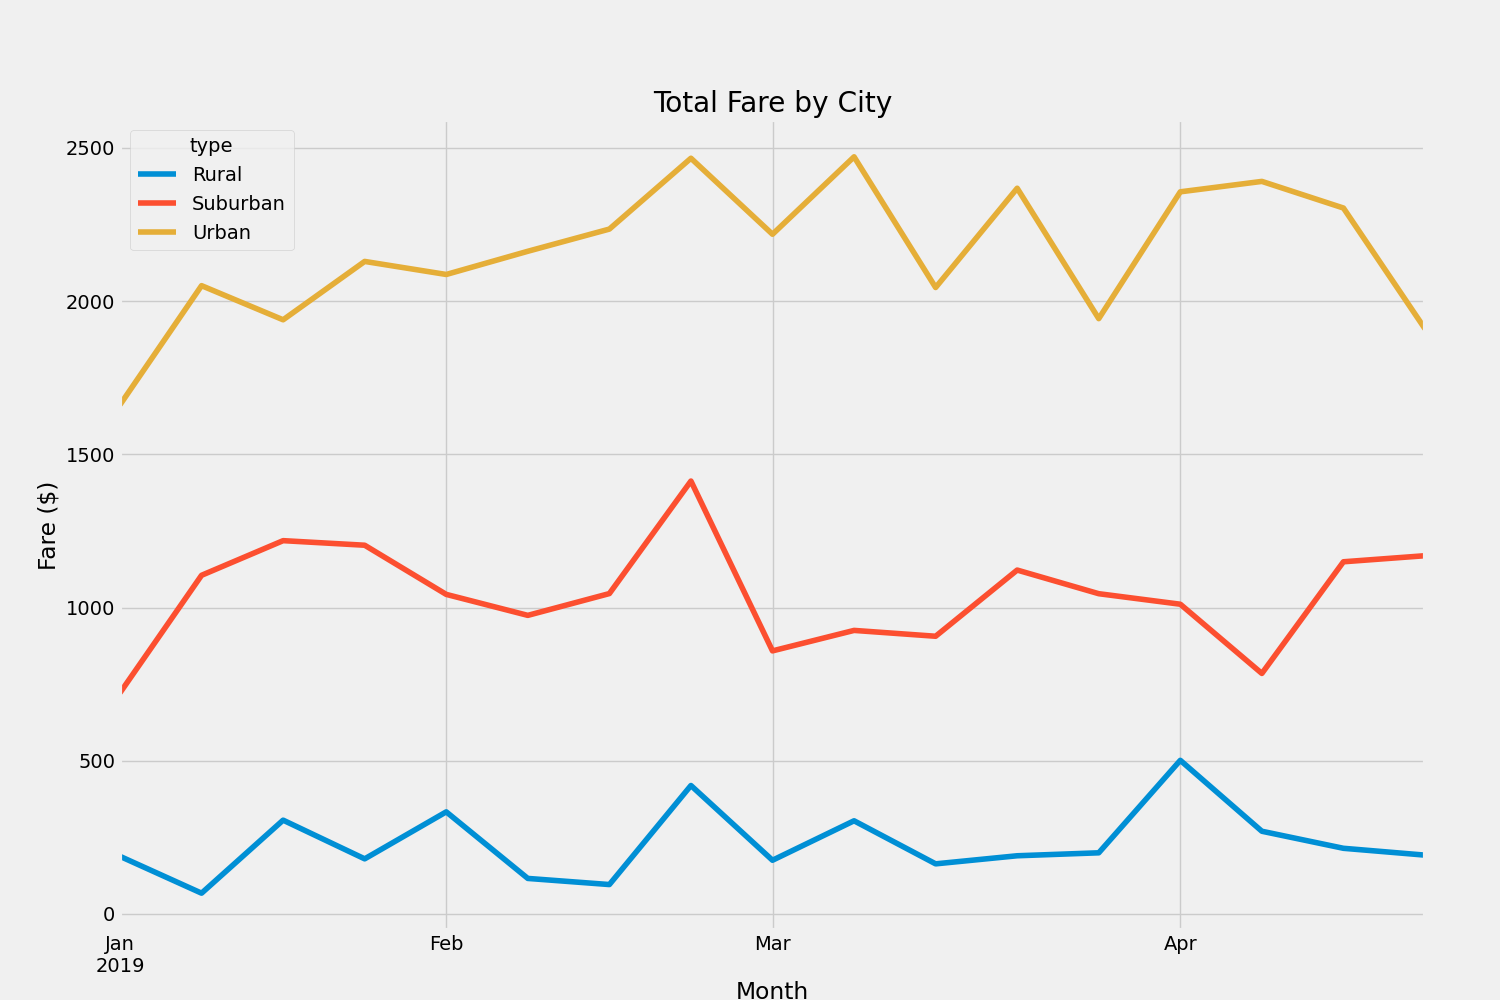

In [433]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fare_pivot_df.plot(figsize =(15,10))


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

plt.title("Total Fare by City")
plt.ylabel("Fare ($)")
plt.xlabel("Month")
style.use('fivethirtyeight')
plt.show()
plt.savefig("Resources/PyBer_summary.png")
